In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dfs = []
for filename in os.listdir():
    if filename[-4:] != '.csv':
        continue
    
    file_df = pd.read_csv(filename, index_col=False)
    spl = filename[:-4].split('_')
    file_df['init_type'] = spl[1]
    file_df['instance'] = '_'.join(spl[2:])
    dfs.append(file_df)
df = pd.concat(dfs)
df.reset_index(inplace=True, drop=True)
df.head()

,id,cost,hd_time,ls_time,diversity,init_type,instance
0,0,2703070.0,0.439,1.140,52.8837,hd,Beijing-6
1,1,2706370.0,0.427,1.091,54.2946,hd,Beijing-6
2,2,2711280.0,0.436,1.124,52.9147,hd,Beijing-6
3,3,2711450.0,0.512,1.145,56.1705,hd,Beijing-6
4,4,2711640.0,0.419,1.235,55.7519,hd,Beijing-6


In [4]:
instance_ubs = {
    'Beijing-6': 2561113,
    'Beijing-8': 3136727,
    'Hefei-10': 1748829,
    'K5_g-6': 3109473,
    'N5_g-5': 3325667,
    'O1_g-4': 2597731,
    'O1_p-2': 2146477,
    'S2_g-6': 1439140
}
df['gap'] = 0
df['total_time'] = df['ls_time'] + df['hd_time']
for i in df.index.values:
    df.loc[i, 'gap'] = df.loc[i, 'cost'] / instance_ubs[df.loc[i, 'instance']] - 1
df['gap'] = df['gap'] * 100
df.head()

,id,cost,hd_time,ls_time,diversity,init_type,instance,gap,total_time
0,0,2703070.0,0.439,1.140,52.8837,hd,Beijing-6,5.542785,1.579
1,1,2706370.0,0.427,1.091,54.2946,hd,Beijing-6,5.671636,1.518
2,2,2711280.0,0.436,1.124,52.9147,hd,Beijing-6,5.863349,1.560
3,3,2711450.0,0.512,1.145,56.1705,hd,Beijing-6,5.869987,1.657
4,4,2711640.0,0.419,1.235,55.7519,hd,Beijing-6,5.877406,1.654


In [5]:
groups = df.groupby('init_type')
old = groups.get_group('old')
hd = groups.get_group('hd')
ten = groups.get_group('ten')
unlimited = groups.get_group('unlimited')
init_df = pd.concat([old, ten, hd, unlimited])
init_df.tail()

,id,cost,hd_time,ls_time,diversity,init_type,instance,gap,total_time
4997,95,1396680.0,11.075,4.783,51.3084,unlimited,S2_g-6,-2.950373,15.858
4998,96,1396800.0,2.595,4.294,44.8718,unlimited,S2_g-6,-2.942035,6.889
4999,97,1401490.0,8.898,4.316,50.0615,unlimited,S2_g-6,-2.616146,13.214
5000,98,1402560.0,1.535,4.250,42.6677,unlimited,S2_g-6,-2.541796,5.785
5001,99,1403200.0,2.269,4.344,43.7039,unlimited,S2_g-6,-2.497325,6.613


In [6]:
old.tail()

,id,cost,hd_time,ls_time,diversity,init_type,instance,gap,total_time
2474,95,1483930.0,0.0,21.781,64.7875,old,S2_g-6,3.112275,21.781
2475,96,1484480.0,0.0,22.390,64.3748,old,S2_g-6,3.150493,22.390
2476,97,1494240.0,0.0,21.277,65.1124,old,S2_g-6,3.828675,21.277
2477,98,1501520.0,0.0,23.031,65.5515,old,S2_g-6,4.334533,23.031
2478,99,1516990.0,0.0,24.570,63.8918,old,S2_g-6,5.409481,24.570


In [7]:
# Figure vars
instance_sizes = {
    'Beijing-6': 2151,
    'Beijing-8': 2868,
    'Hefei-10': 1212,
    'K5_g-6': 8267,
    'N5_g-5': 6165,
    'O1_g-4': 8581,
    'O1_p-2': 8220,
    'S2_g-6': 3797
}
instances_ordered_by_size = ['Hefei-10','Beijing-6','Beijing-8','S2_g-6','N5_g-5','O1_p-2','K5_g-6','O1_g-4']
init_method_order = ['old', 'unlimited','hd','ten']
xticklabels = ['Traditional','Standard HD','Bounded HD', 'Two-Step HD']

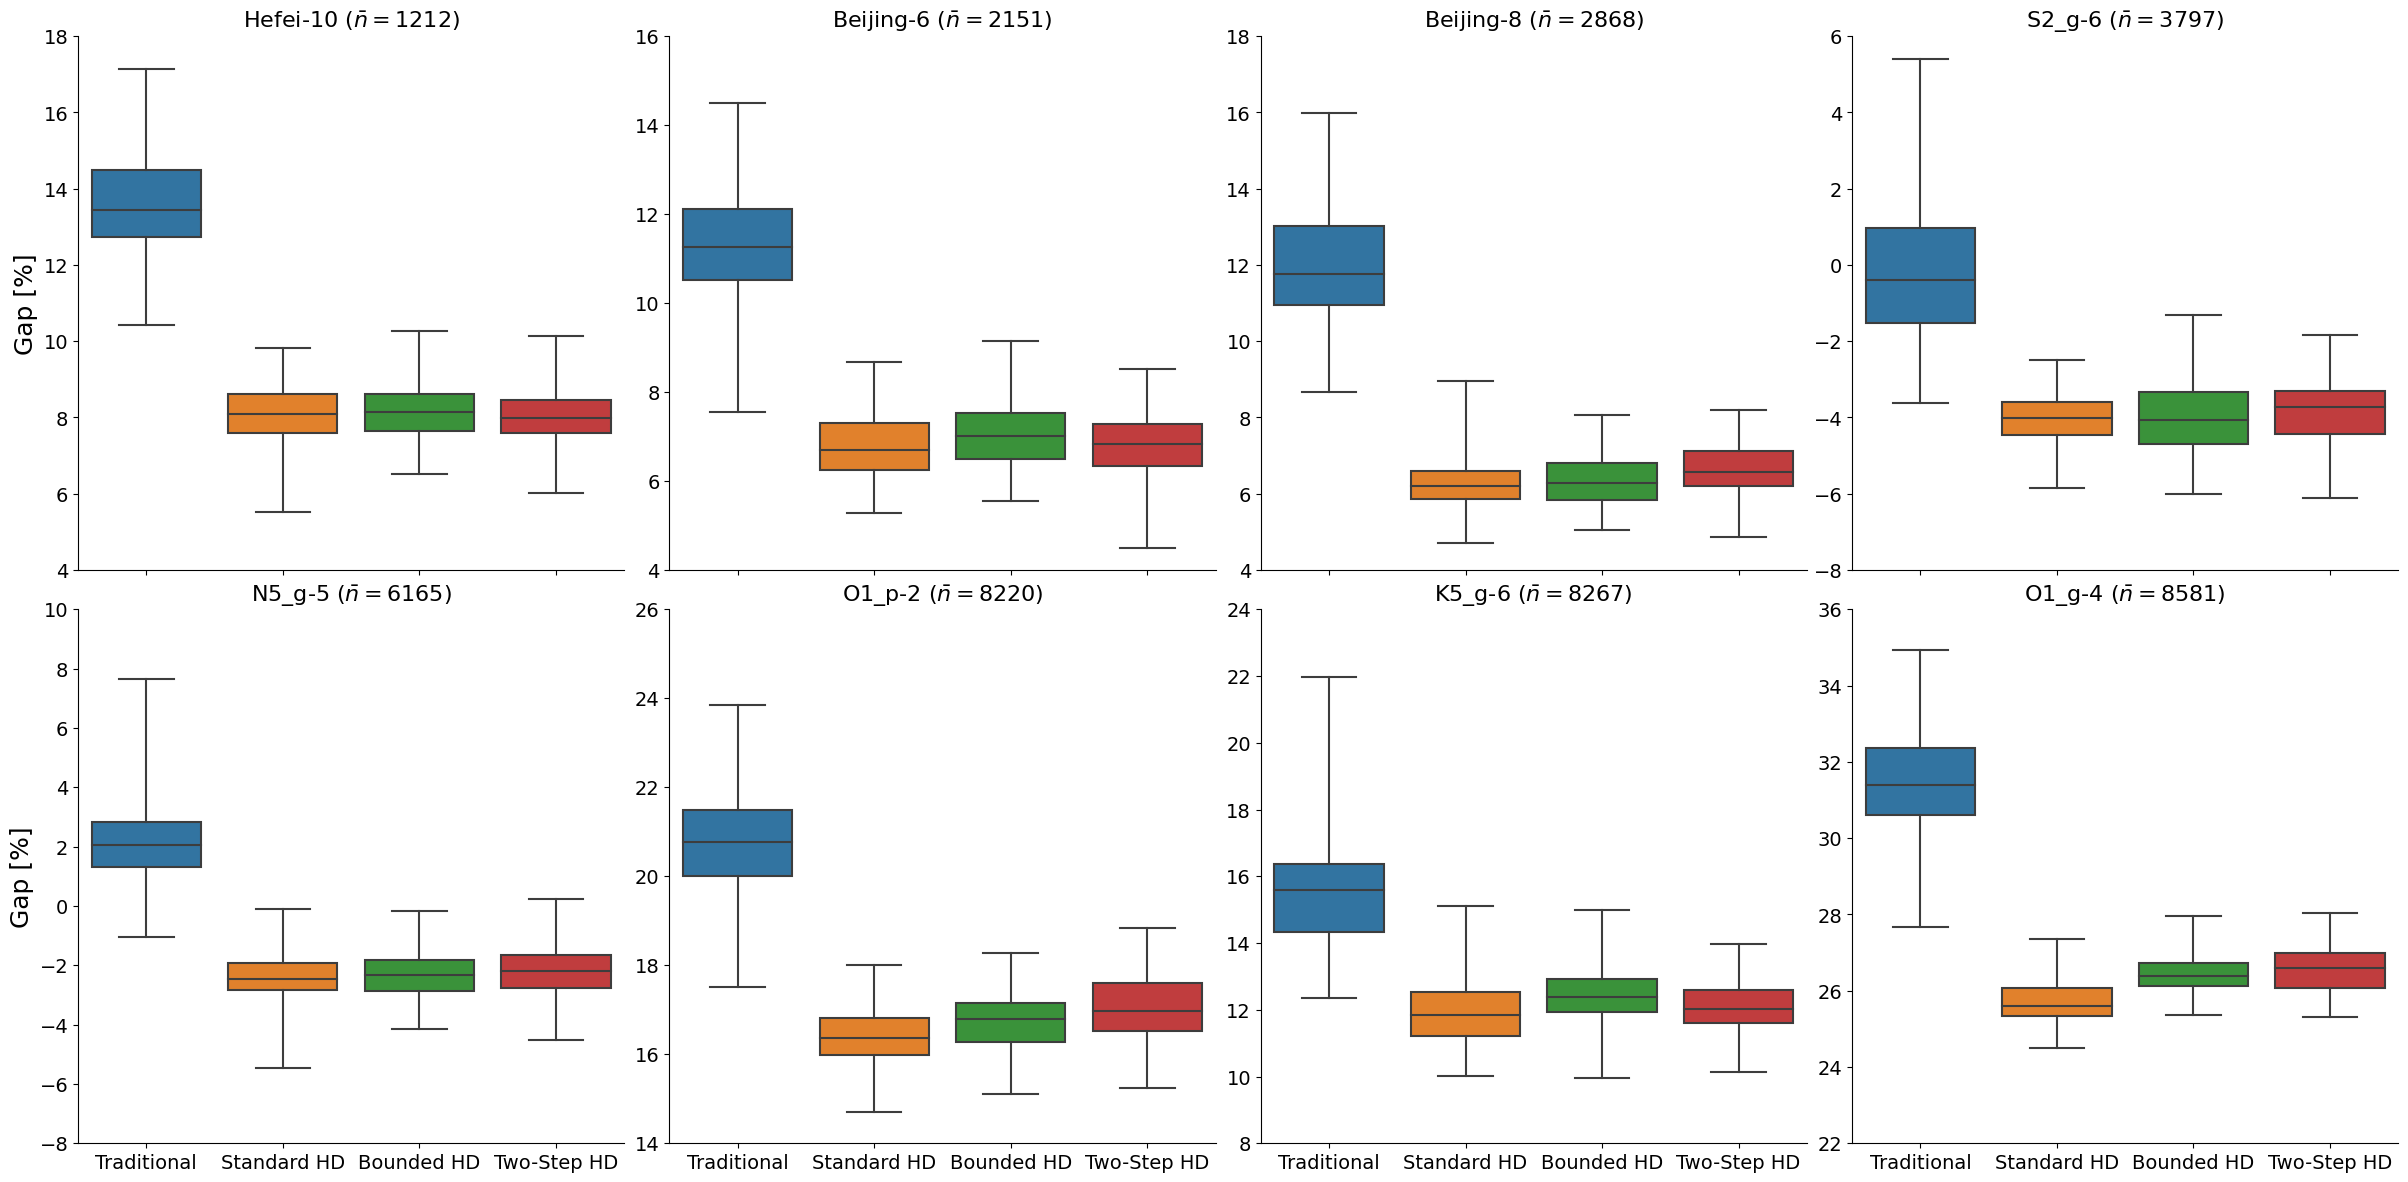

In [8]:
#fig, ax = plt.subplots(figsize=(16,10))
#sns.violinplot(data=df, x='instance', y='gap', hue='init_type', ax=ax)
g = sns.catplot(data=init_df, x='init_type', y='gap', col='instance', kind='box', height=6, aspect=1,
            col_wrap=4, sharey=False, whis=20, col_order=instances_ordered_by_size, order=init_method_order)
g.set_axis_labels(y_var="Gap [%]", x_var="", fontsize=18)
g.set_yticklabels(fontsize=14)
g.set_xticklabels(xticklabels, fontsize=14)
g.set_titles("{col_name}")
for ax, inm in zip(g.axes, instances_ordered_by_size):
    ax.set_title(inm + r" ($\bar{n} = $" + str(instance_sizes[inm]) + "$)$", fontsize=16)

#g.figure.savefig("Figures/init_method_gap.pdf")

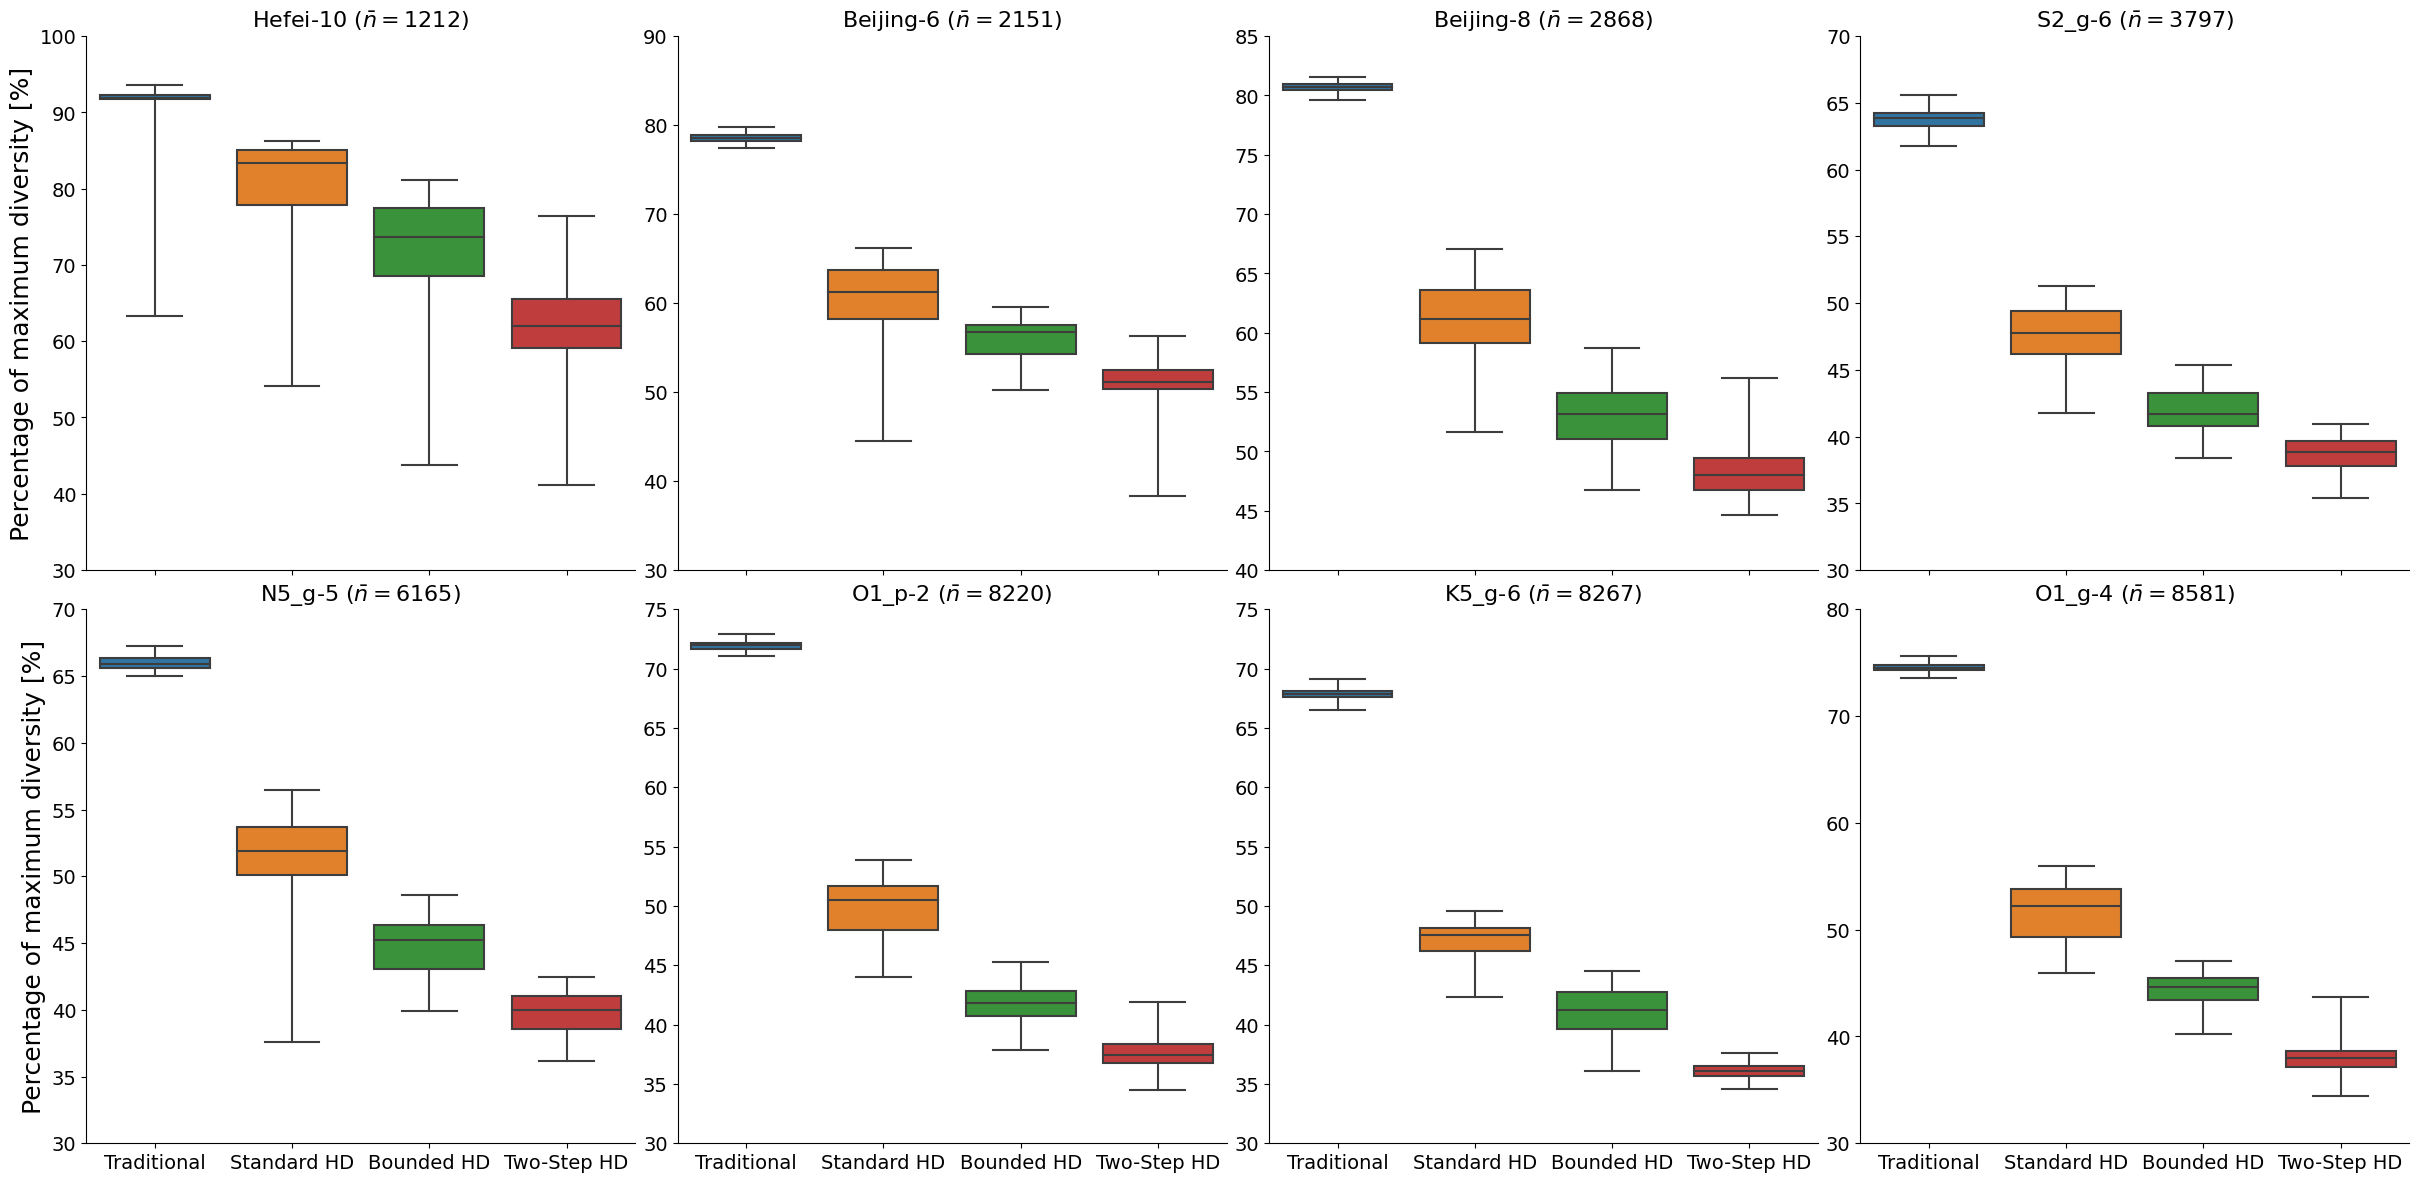

In [9]:
#fig, ax = plt.subplots(figsize=(16,10))
#sns.boxplot(data=df, x='instance', y='diversity', hue='init_type', ax=ax)
g = sns.catplot(data=init_df, x='init_type', y='diversity', col='instance', kind='box', height=6, aspect=1,
            col_wrap=4, sharey=False, whis=200, col_order=instances_ordered_by_size, order=init_method_order)
g.set_axis_labels(y_var="Percentage of maximum diversity [%]", x_var="", fontsize=18)
g.set_yticklabels(fontsize=14)
g.set_xticklabels(xticklabels, fontsize=14)
g.set_titles("{col_name}")
for ax, inm in zip(g.axes, instances_ordered_by_size):
    ax.set_title(inm + r" ($\bar{n} = $" + str(instance_sizes[inm]) + "$)$", fontsize=16)

#g.figure.savefig("Figures/init_method_div.pdf")

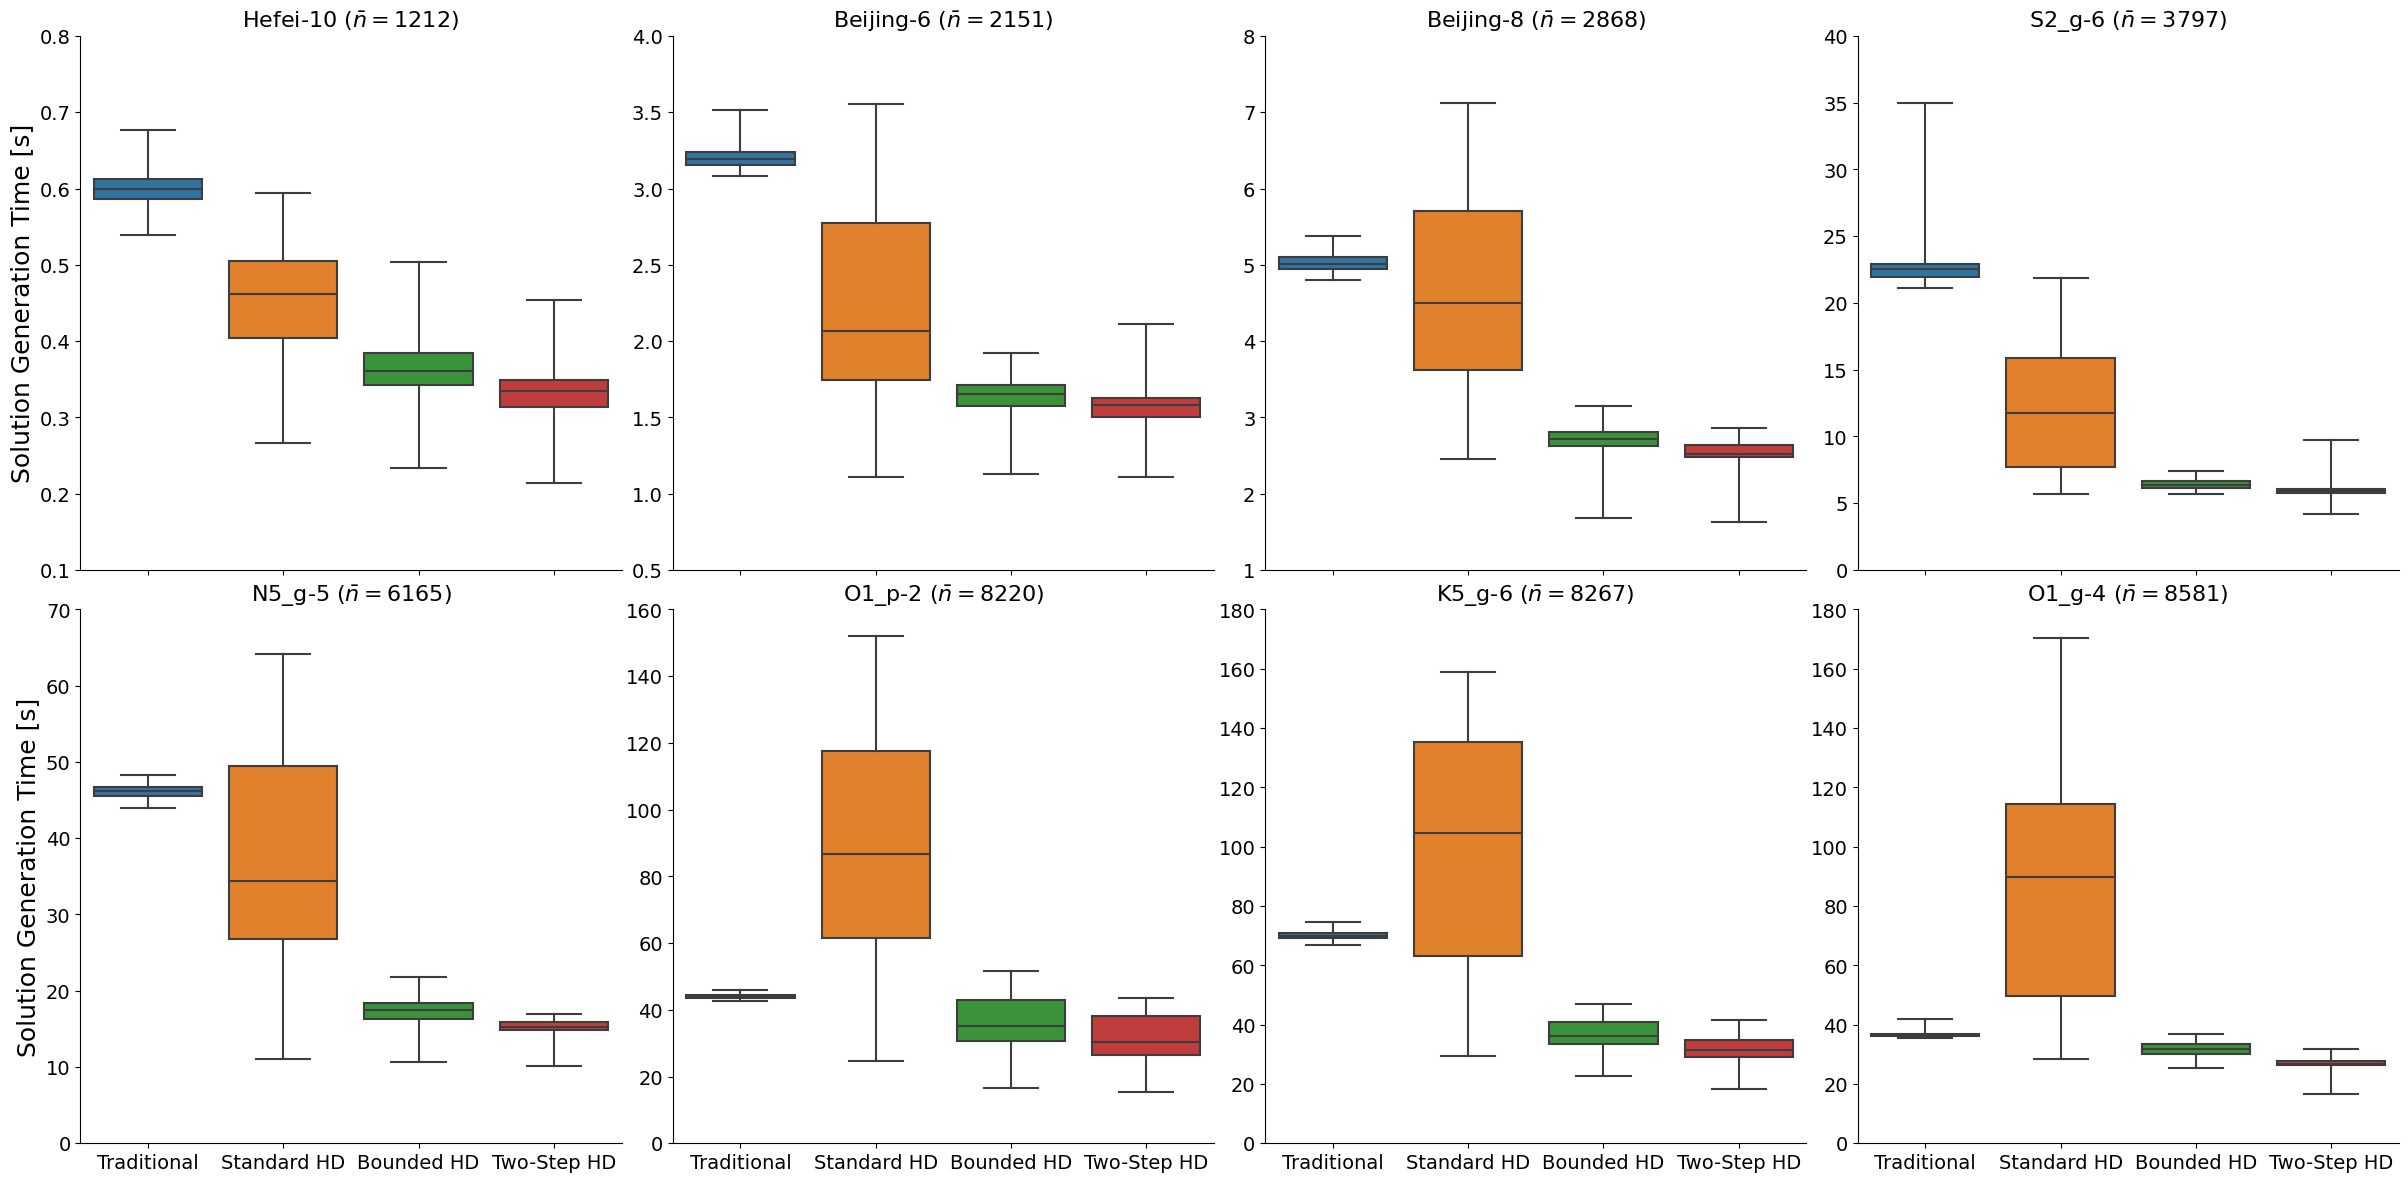

In [10]:
#fig, ax = plt.subplots(figsize=(16,10))
#sns.boxplot(data=df, x='instance', y='total_time', hue='init_type', ax=ax)
g = sns.catplot(data=init_df, x='init_type', y='total_time', col='instance', kind='box', height=6, aspect=1,
            col_wrap=4, sharey=False, whis=20, col_order=instances_ordered_by_size, order=init_method_order)
g.set_axis_labels(y_var="Solution Generation Time [s]", x_var='', fontsize=18)
g.set_yticklabels(fontsize=14)
g.set_xticklabels(xticklabels, fontsize=14)
g.set_titles("{col_name}")
for ax, inm in zip(g.axes, instances_ordered_by_size):
    ax.set_title(inm + r" ($\bar{n} = $" + str(instance_sizes[inm]) + "$)$", fontsize=16)

#g.figure.savefig("Figures/init_method_time.pdf")

In [11]:
init_df = pd.concat([old, hd])
init_method_order = ['old','hd']
xticklabels = ['Traditional','Hierachical Decomposition']

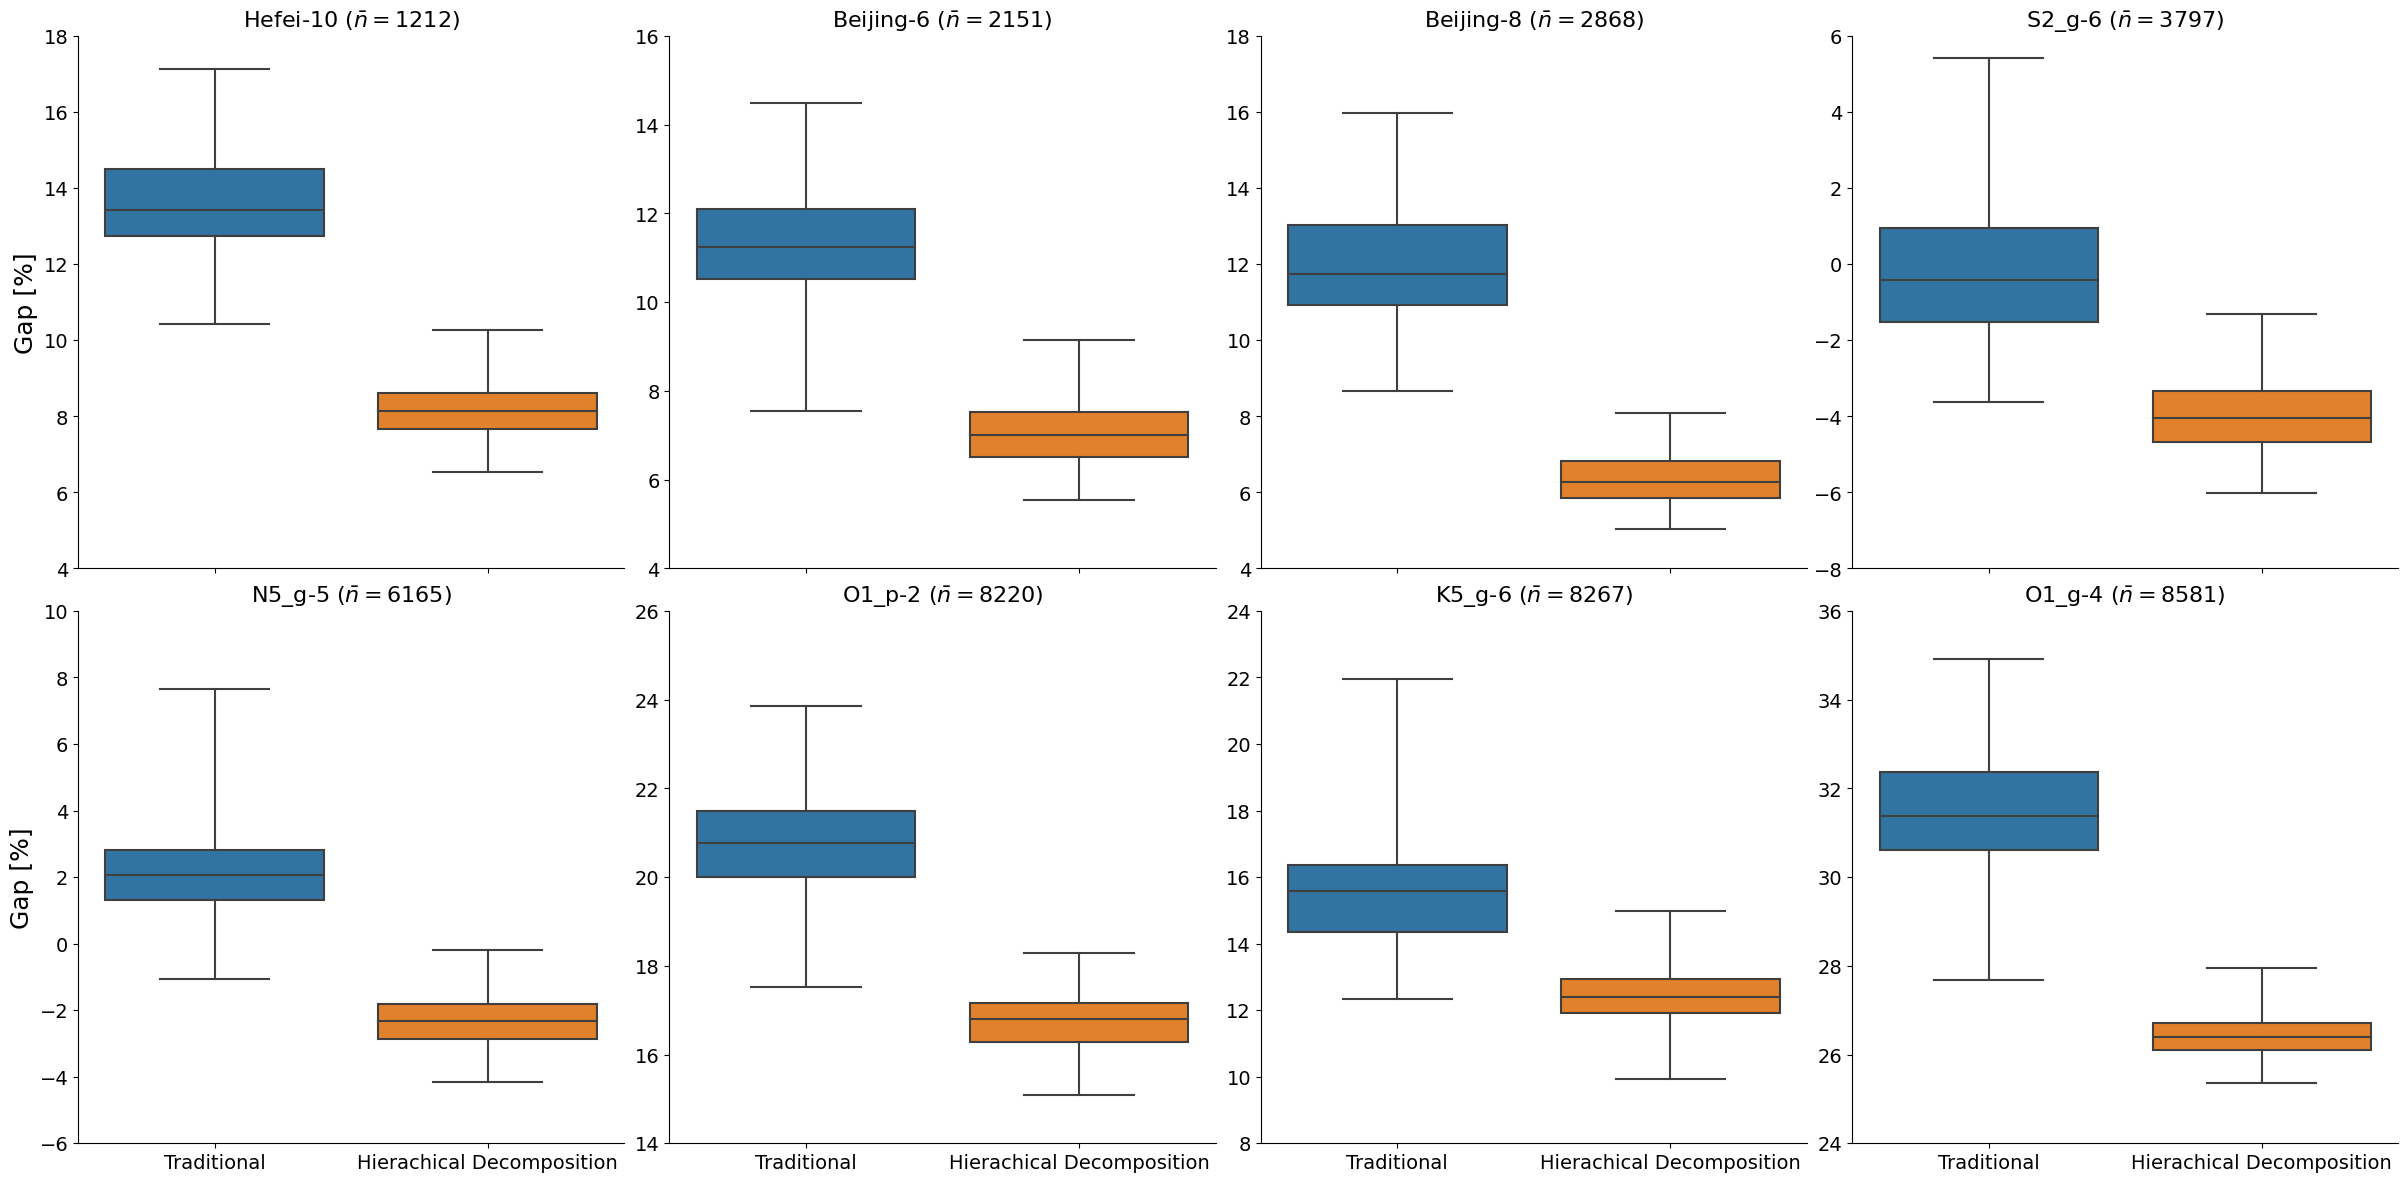

In [12]:
g = sns.catplot(data=init_df, x='init_type', y='gap', col='instance', kind='box', height=6, aspect=1,
            col_wrap=4, sharey=False, whis=20, col_order=instances_ordered_by_size, order=init_method_order)
g.set_axis_labels(y_var="Gap [%]", x_var="", fontsize=18)
g.set_yticklabels(fontsize=14)
g.set_xticklabels(xticklabels, fontsize=14)
g.set_titles("{col_name}")
for ax, inm in zip(g.axes, instances_ordered_by_size):
    ax.set_title(inm + r" ($\bar{n} = $" + str(instance_sizes[inm]) + "$)$", fontsize=16)


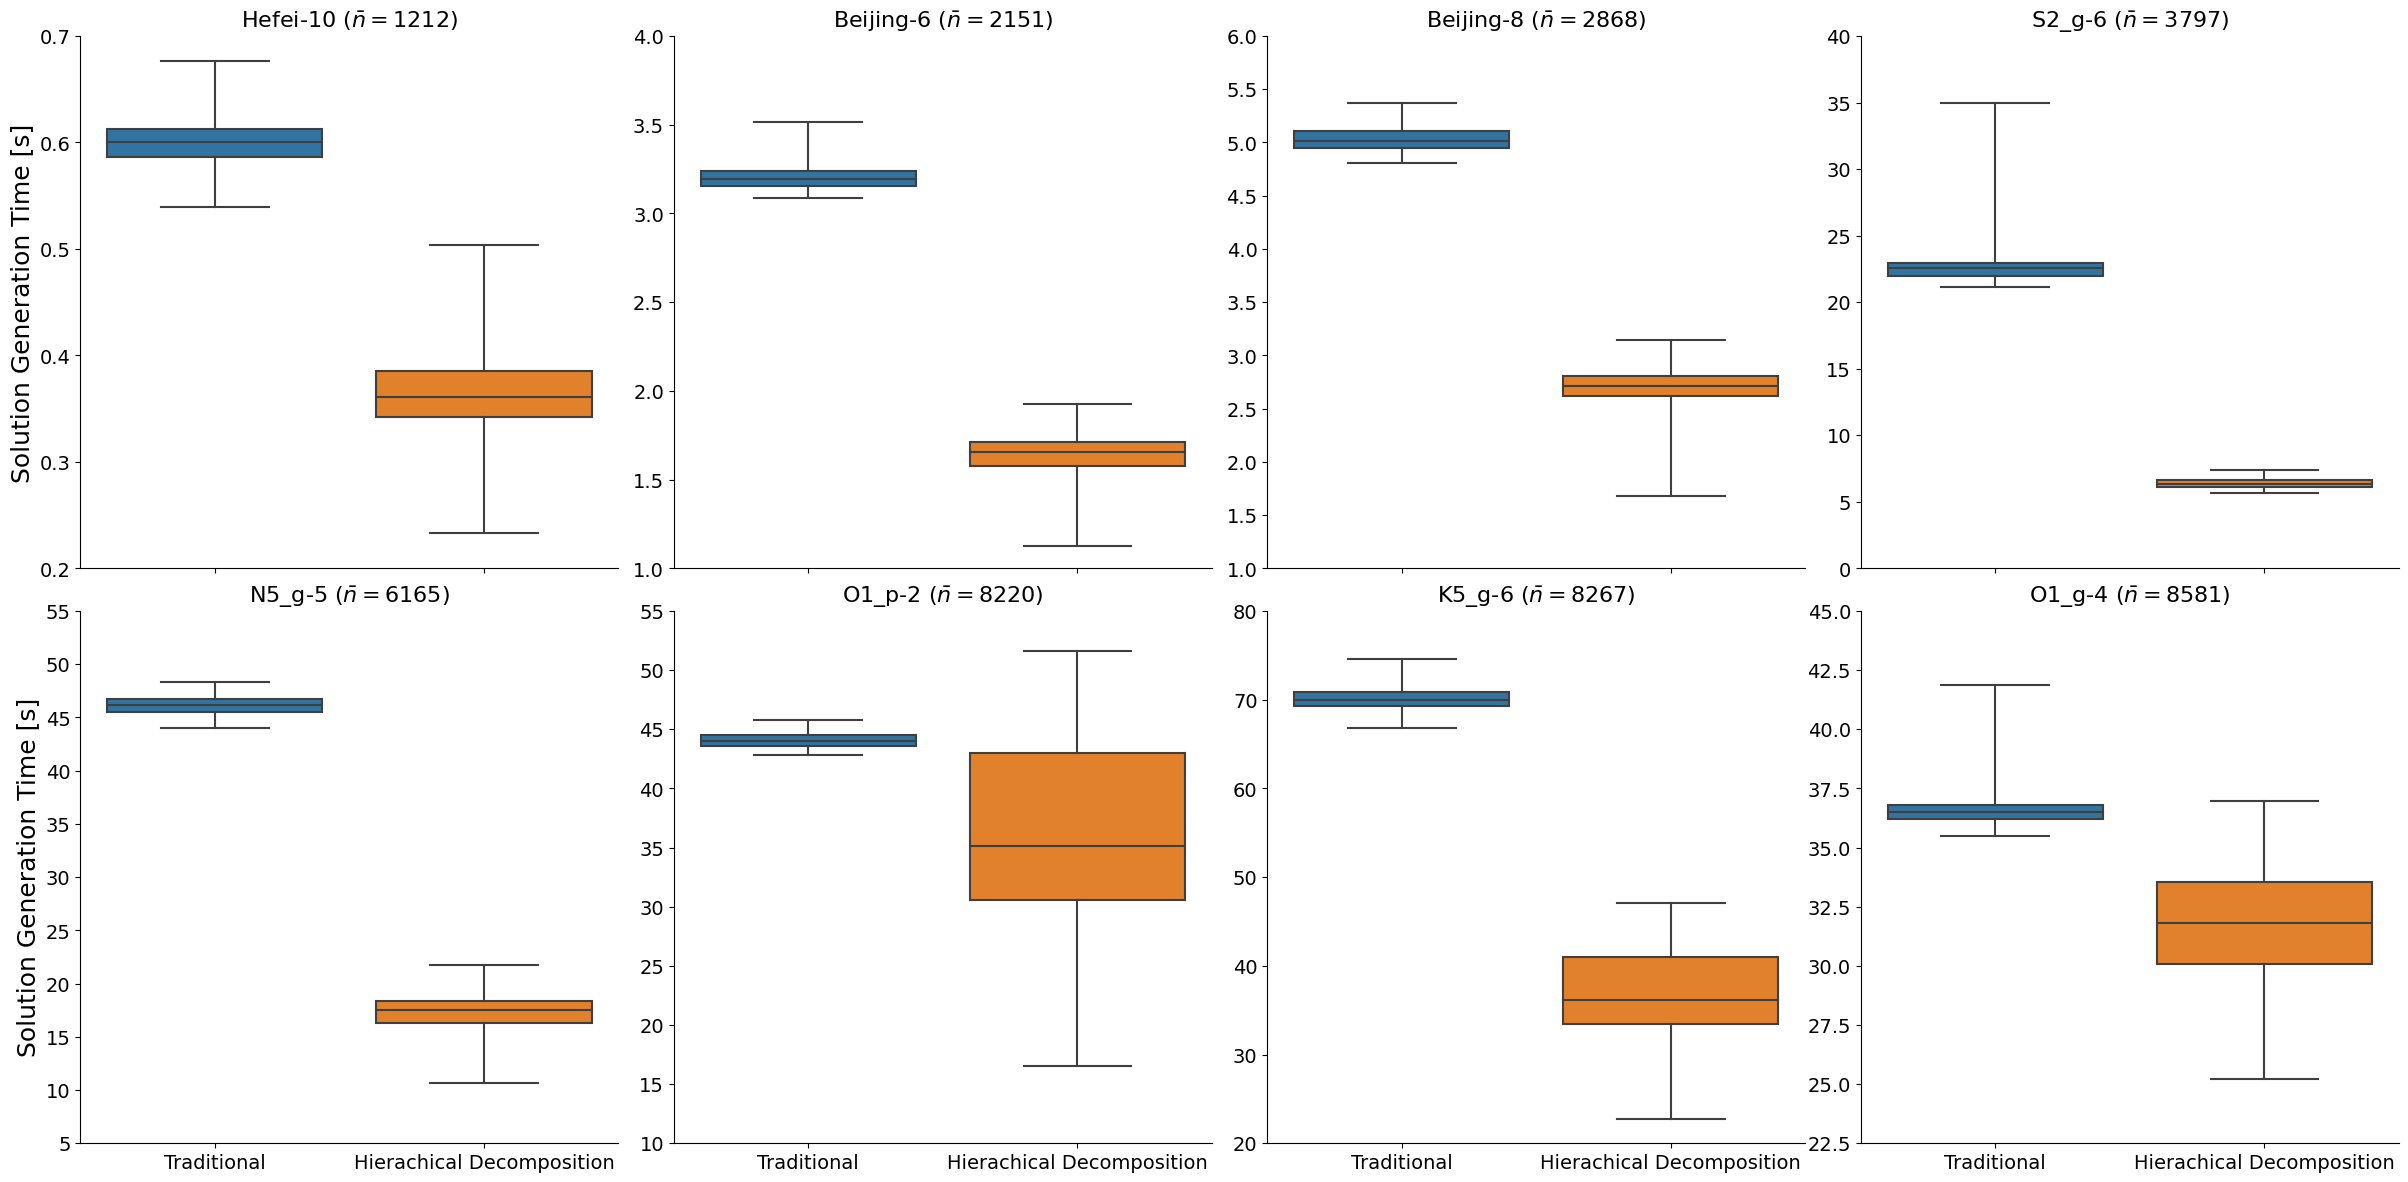

In [18]:
g = sns.catplot(data=init_df, x='init_type', y='total_time', col='instance', kind='box', height=6, aspect=1,
            col_wrap=4, sharey=False, whis=20, col_order=instances_ordered_by_size, order=init_method_order)
g.set_axis_labels(y_var="Solution Generation Time [s]", x_var='', fontsize=18)
g.set_yticklabels(fontsize=14)
g.set_xticklabels(xticklabels, fontsize=14)
g.set_titles("{col_name}")
for ax, inm in zip(g.axes, instances_ordered_by_size):
    ax.set_title(inm + r" ($\bar{n} = $" + str(instance_sizes[inm]) + "$)$", fontsize=16)

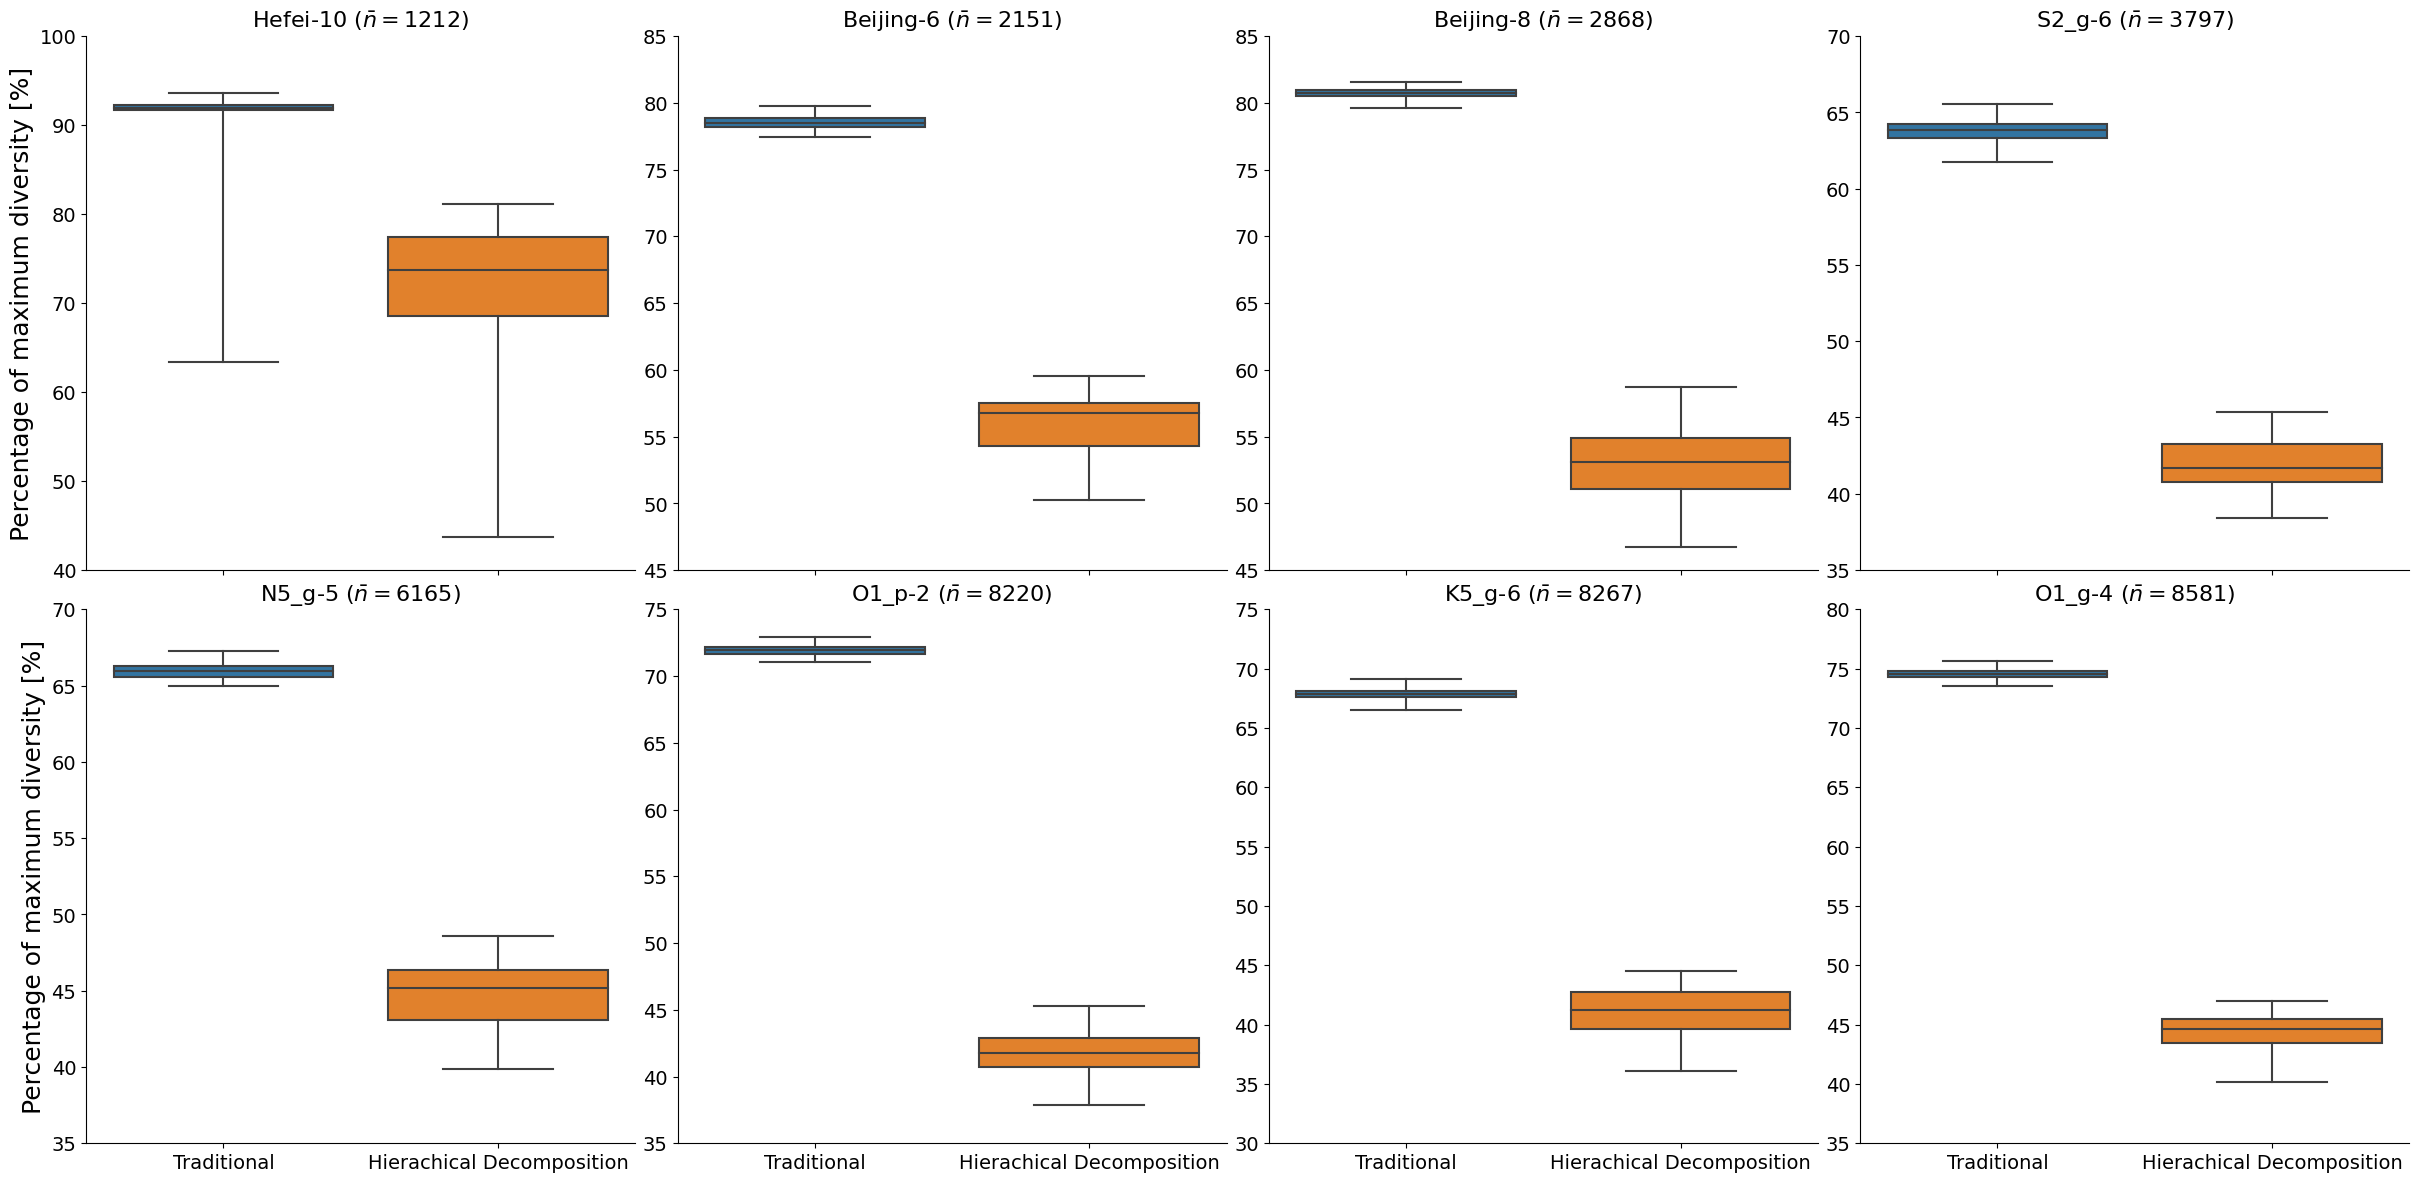

In [17]:
g = sns.catplot(data=init_df, x='init_type', y='diversity', col='instance', kind='box', height=6, aspect=1,
            col_wrap=4, sharey=False, whis=200, col_order=instances_ordered_by_size, order=init_method_order)
g.set_axis_labels(y_var="Percentage of maximum diversity [%]", x_var="", fontsize=18)
g.set_yticklabels(fontsize=14)
g.set_xticklabels(xticklabels, fontsize=14)
g.set_titles("{col_name}")
for ax, inm in zip(g.axes, instances_ordered_by_size):
    ax.set_title(inm + r" ($\bar{n} = $" + str(instance_sizes[inm]) + "$)$", fontsize=16)

In [13]:
data_old = old.groupby('instance').mean()
data_hd = hd.groupby('instance').mean()
print("Instance old_gap old_ls_time hd_gap hd_ls_time hd_time")
for i in instances_ordered_by_size:
    
    print(f"{i}   {data_old['gap'][i]:.2f} {data_old['ls_time'][i]:.2f}   " 
          f"{data_hd['gap'][i]:.2f} {data_hd['hd_time'][i]:.2f} {data_hd['ls_time'][i]:.2f}  "
          f"{100 * (1 - (data_hd['hd_time'][i]+data_hd['ls_time'][i])/data_old['ls_time'][i]):.2f} %")

Instance old_gap old_ls_time hd_gap hd_ls_time hd_time
Hefei-10   13.55 0.60   8.15 0.10 0.26  39.75 %
Beijing-6   11.24 3.21   7.05 0.52 1.12  48.64 %
Beijing-8   11.97 5.04   6.39 0.96 1.75  46.19 %
S2_g-6   -0.22 22.60   -3.99 1.99 4.42  71.62 %
N5_g-5   2.18 46.18   -2.34 6.54 10.79  62.48 %
O1_p-2   20.77 44.04   16.77 21.68 14.82  17.11 %
K5_g-6   15.54 70.07   12.48 19.08 17.65  47.58 %
O1_g-4   31.52 36.61   26.40 16.19 15.48  13.47 %


C:\Users\diogo\AppData\Local\Temp\ipykernel_17228\2965224442.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_old = old.groupby('instance').mean()
C:\Users\diogo\AppData\Local\Temp\ipykernel_17228\2965224442.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_hd = hd.groupby('instance').mean()


In [14]:
dfs =[]
for filename in os.listdir():
    spl = filename[:-4].split('_')
    if filename[-4:] != '.csv':
        continue
    elif spl[1] not in ('hd', 'medoid', 'second'):
        continue
    file_df = pd.read_csv(filename)
    file_df['init_type'] = spl[1]
    file_df['instance'] = '_'.join(spl[2:])
    dfs.append(file_df)
heu = pd.concat(dfs)
heu.reset_index(inplace=True)

instance_data = {
    'Beijing-6': 2561113,
    'Beijing-8': 3136727,
    'Hefei-10': 1748829,
    'K5_g-6': 3109473,
    'N5_g-5': 3325667,
    'O1_g-4': 2597731,
    'O1_p-2': 2146477,
    'S2_g-6': 1439140
}
heu['gap'] = 0
heu['total_time'] = heu['ls_time'] + heu['hd_time']
for i in heu.index.values:
    heu.loc[i, 'gap'] = heu.loc[i, 'cost'] / instance_data[heu.loc[i, 'instance']] - 1



heu.tail()

,index,id,cost,hd_time,ls_time,diversity,init_type,instance,gap,total_time
2513,95,95,1398750.0,1.949,4.438,39.8051,second,S2_g-6,-0.028065,6.387
2514,96,96,1400110.0,1.682,4.162,39.6294,second,S2_g-6,-0.027120,5.844
2515,97,97,1400330.0,0.141,4.204,40.4549,second,S2_g-6,-0.026967,4.345
2516,98,98,1406320.0,1.999,4.413,41.1398,second,S2_g-6,-0.022805,6.412
2517,99,99,1417080.0,2.000,4.408,40.5866,second,S2_g-6,-0.015329,6.408


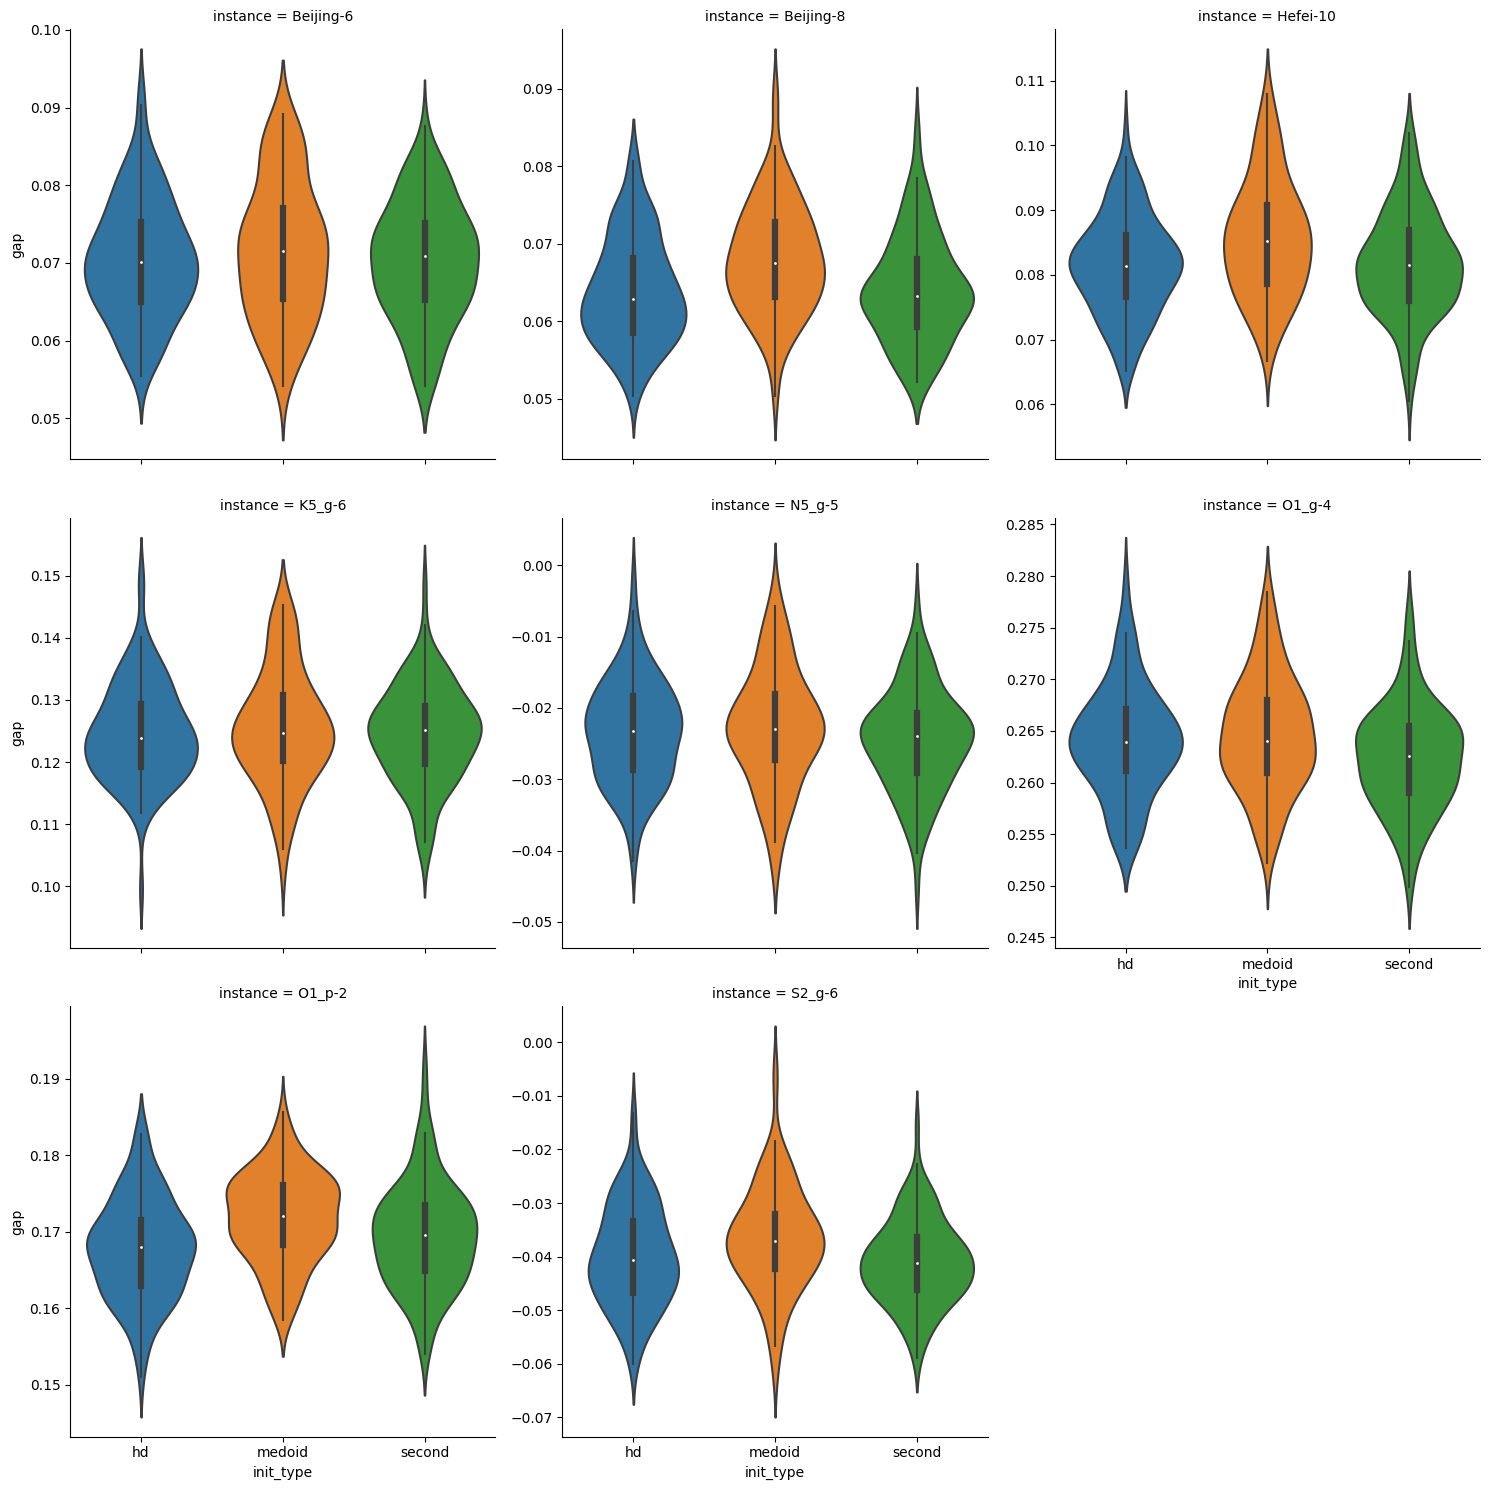

In [15]:
sns.catplot(data=heu, x='init_type', y='gap', col='instance', kind='violin', col_wrap=3, sharey=False)

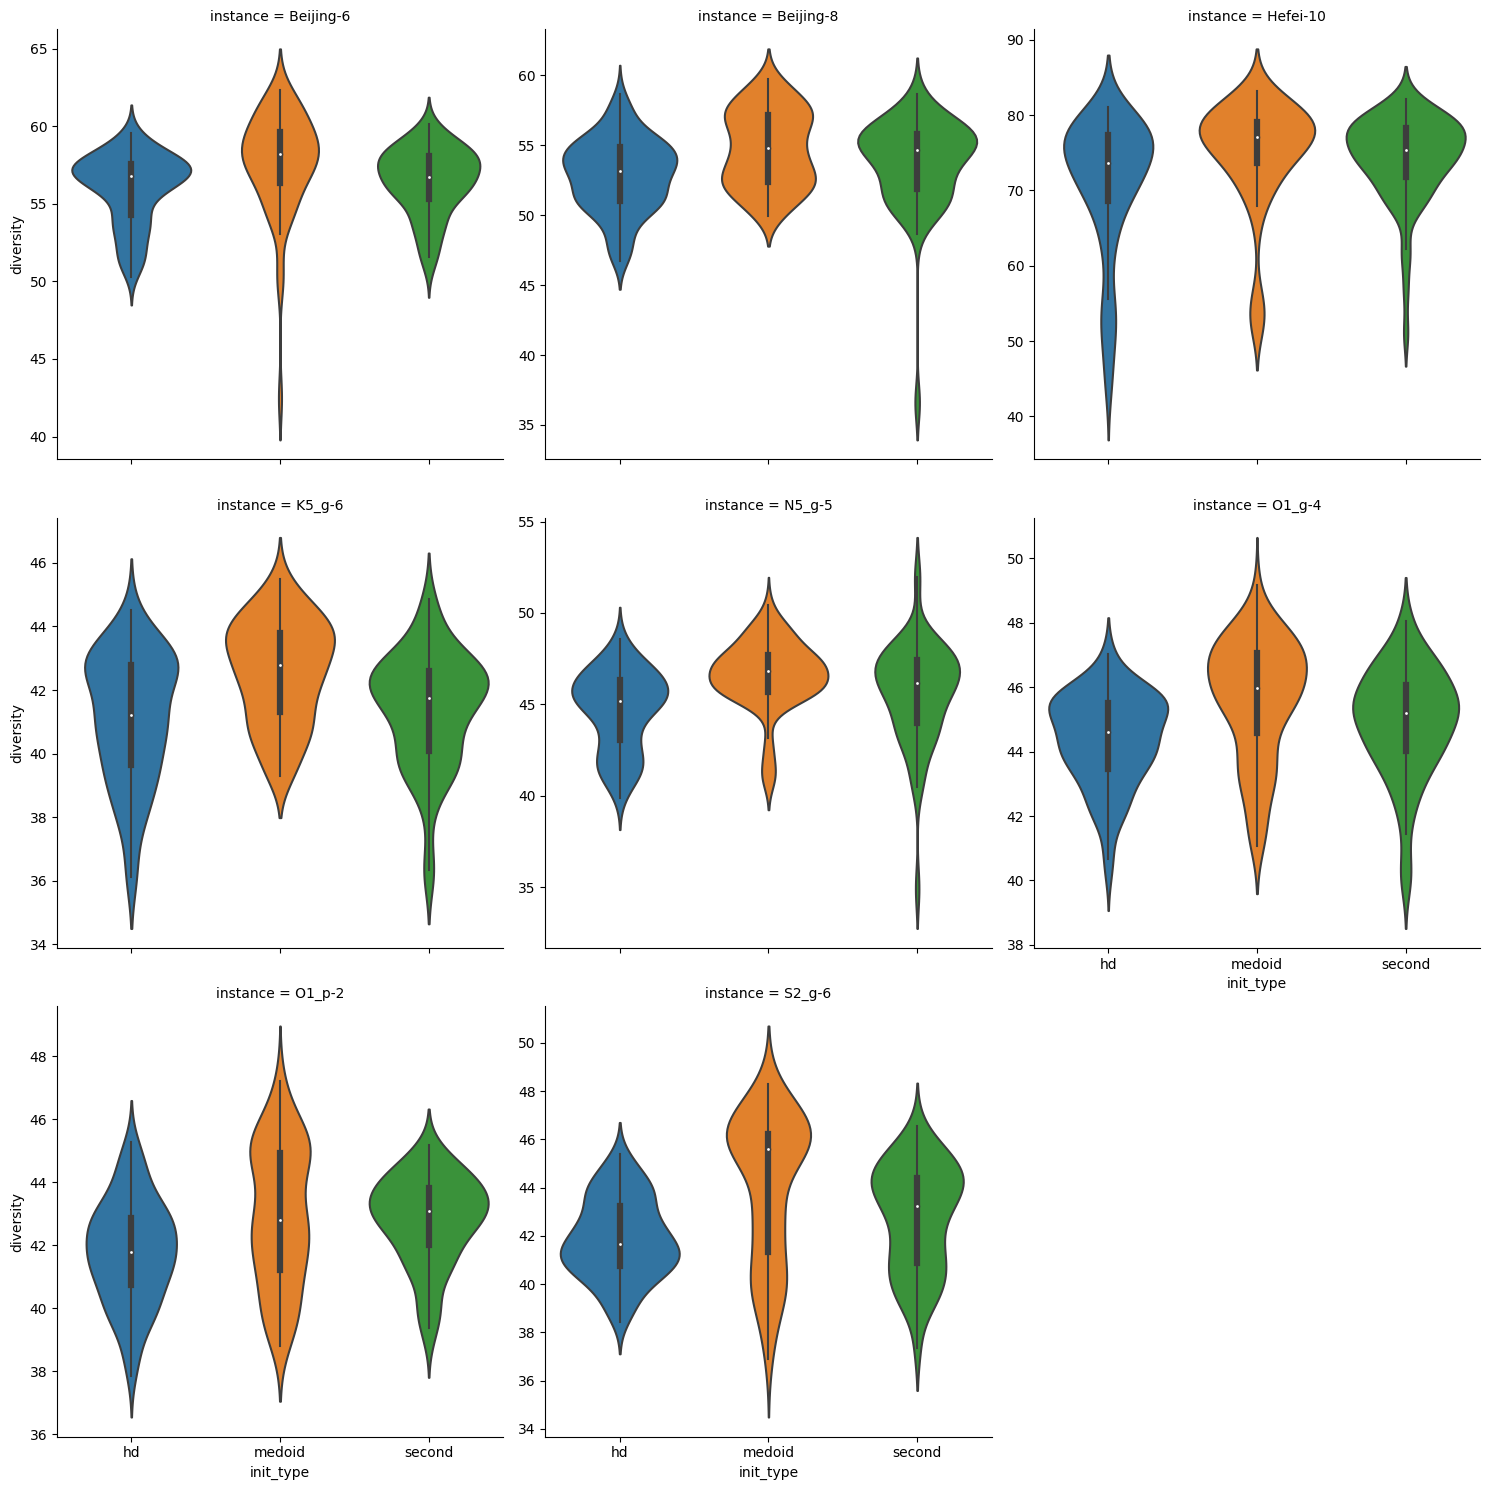

In [16]:
sns.catplot(data=heu, x='init_type', y='diversity', col='instance', kind='violin', col_wrap=3, sharey=False)